In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# para figuras interativas usar 'notebook' ao inves de 'inline'
%matplotlib notebook

In [20]:
# Resetando gerador de sequências pseudo-aleatórias.
np.random.seed(1234)

### Gerando a função observável.

In [21]:
# Número de exemplos.
N = 1000

# Atributos.
x1 = 2*np.random.rand(N,1) - 1
x2 = 2*np.random.rand(N,1) - 1

# Ruído.
w = np.random.randn(N,1)

# Função objetivo.
y = x1 + x2

# Função observável (ruidosa)
y_noisy = y + w

### Plotando a função observável.

<IPython.core.display.Javascript object>


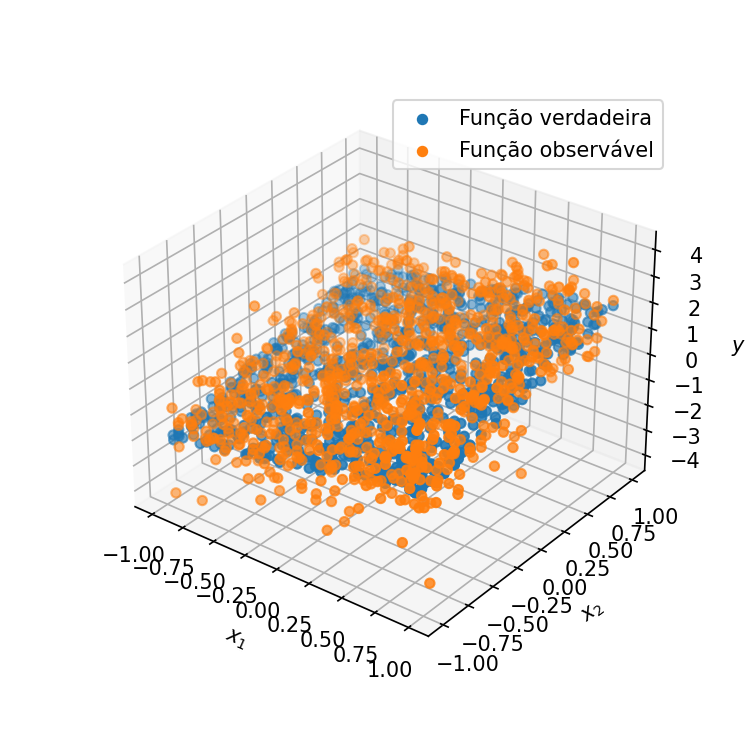

In [22]:
# Plot observable function.
fig = plt.figure(figsize=(5,5))
ax = fig.gca(projection='3d')

ax.scatter(x1,x2,y, label='Função verdadeira')
ax.scatter(x1,x2,y_noisy, label='Função observável')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
plt.legend()
plt.show()

### Encontrando a solução ótima com a equação normal.

In [23]:
# Concatenando os 2 vetores de atributos.
X = np.c_[x1, x2]

# Equação normal.
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y_noisy))

# Imprimindo os valores encontrados para os pesos, a1 e a2.
print('peso a1:', a_opt[0][0])
print('peso a2:', a_opt[1][0])

# Realizando a predição com a função hipótese: yhat = a1*x1 + a2*x2.
# Perceba que a função hipótese está em sua forma matricial.
yhat = X.dot(a_opt)

# Calculando o erro quadrático médio.
Joptimum = (1.0/N)*np.sum(np.power((y_noisy - yhat), 2))

# Imprimindo o valor do erro.
print('Erro:', Joptimum)

peso a1: 1.05622595321395
peso a2: 1.0787291149894207
Erro: 0.9669864585231436


### Plotando a superfície de erro.

In [24]:
def calculateErrorSurface(y, x1, x2):
    """
    Generate data points for plotting the error surface.
    """
    # Generate values for parameter space.
    M = 200
    a1 = np.linspace(-2.0, 4.0, M)
    a2 = np.linspace(-2.0, 4.0, M)

    A1, A2 = np.meshgrid(a1, a2)

    # Generate points for plotting the cost-function surface.
    J = np.zeros((M,M))
    for iter1 in range(0, M):
        for iter2 in range(0, M):
            yhat = A1[iter1][iter2]*x1 + A2[iter1][iter2]*x2
            J[iter1][iter2] = (1.0/len(y))*np.sum(np.square(y - yhat))           
            
    return J, A1, A2

<IPython.core.display.Javascript object>


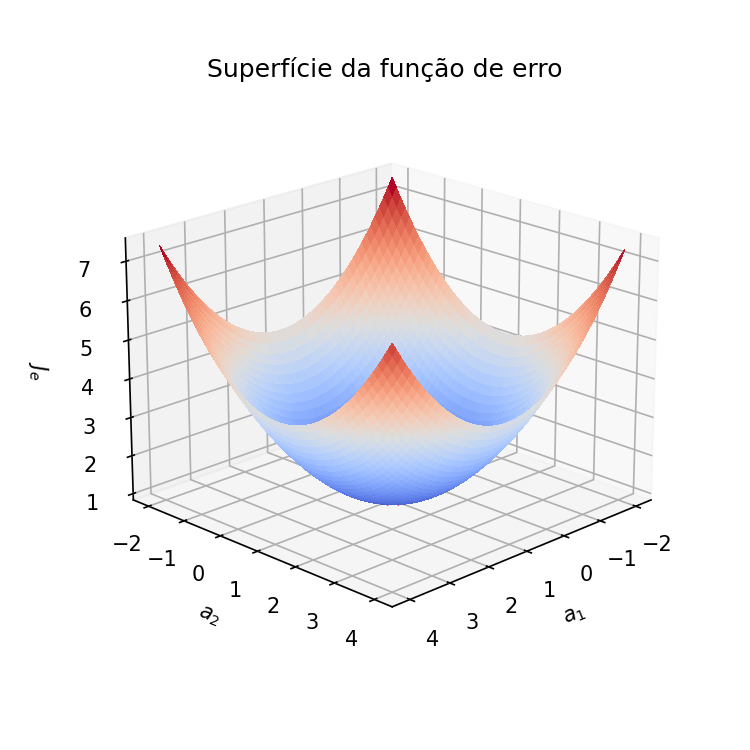

In [25]:
J, A1, A2 = calculateErrorSurface(y_noisy, x1, x2)

# Plot cost-function surface.
fig = plt.figure(figsize=(5,5))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.plot(a_opt[0,0],a_opt[1,0], Joptimum, c='r', marker='*', markersize=10)
ax.set_xlabel('$a_1$')
ax.set_ylabel('$a_2$')
ax.set_zlabel('$J_e$')
plt.title('Superfície da função de erro')
ax.view_init(20, 45)
#plt.savefig("error_surface_example2.png", dpi=600)
#Show the plot.
plt.show()

### Plotando a superfície de contorno

<IPython.core.display.Javascript object>


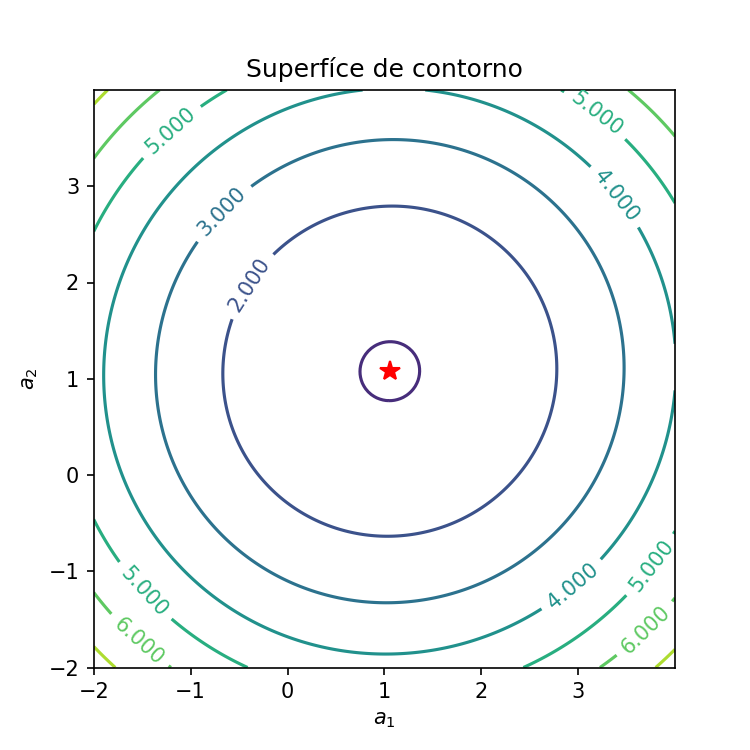

In [26]:
fig = plt.figure(figsize=(5,5))

cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$')
plt.ylabel('$a_2$')
plt.title('Superfíce de contorno')

plt.plot(a_opt[0], a_opt[1], c='r', marker='*', markersize=10)

plt.xticks(np.arange(-2, 4, step=1.0))
plt.yticks(np.arange(-2, 4, step=1.0))

plt.savefig("contour_surface_example2.png", dpi=600)

plt.show()

### Plotando a função observável juntamente com o hiperplano encontrado com a equação normal.

<IPython.core.display.Javascript object>


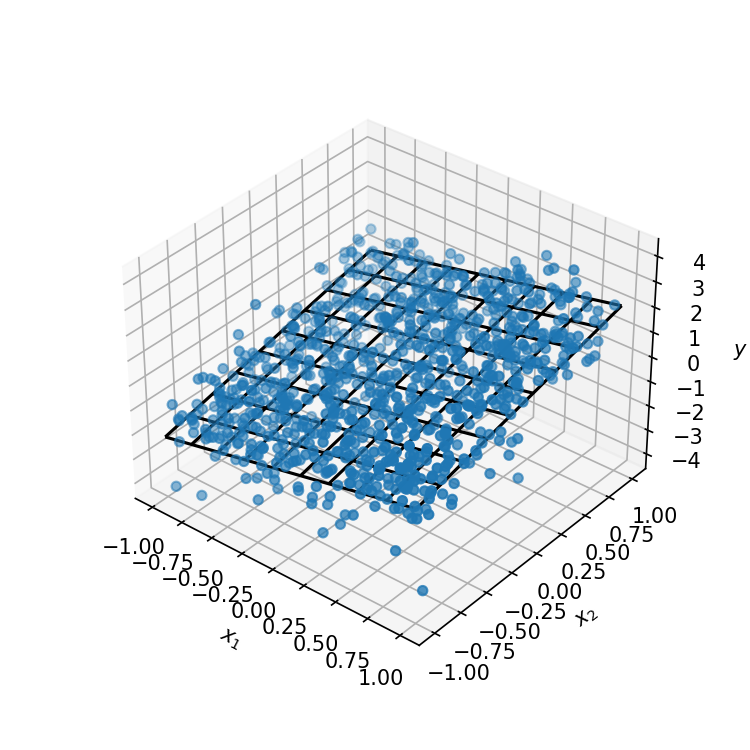

In [29]:
# Plot cost-function surface.
fig = plt.figure(figsize=(5,5))
ax = fig.gca(projection='3d')

N = 10
x1_ = np.linspace(-1.0, 1.0, N)
x2_ = np.linspace(-1.0, 1.0, N)
X1, X2 = np.meshgrid(x1_, x2_)
Y = a_opt[0]*X1 + a_opt[1]*X2

ax.scatter(x1,x2,y_noisy)
ax.plot_wireframe(X1, X2, Y, color="black")
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
plt.show()